# Question 1

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numba import njit

# Question a)

## Note:

We have to flip the $y$ axis in order to not generate the image upside down. The list comprehension *[somefunction(m+1j\*n) for n in y for m in x]* is actually a doubly-nested loop, with $y$ running on the outer loop. The first element of $y$ is approximately $-1.5$, and keeping $y=-1.5$ fixed, the line parallel to the $x$ axis is generated, with $x$ running from $-2.5$ to $1$.

However, the imgplot module generates the image from the top left corner of the matrix, thus $y=-1.5$ line would be on top of the image and $y=1.5$ line would be at the bottom, which is not correct at all. 

Transposing the image does not fix the problem either, since it's a rotation. Thus, we need to "reflect" the matrix about the $x$ axis to get the correct output, which is done by using *np.flip(y)*.

One can verify the correctness of the images generated below by comparing the colorbar with the actual outputs of the generating functions.

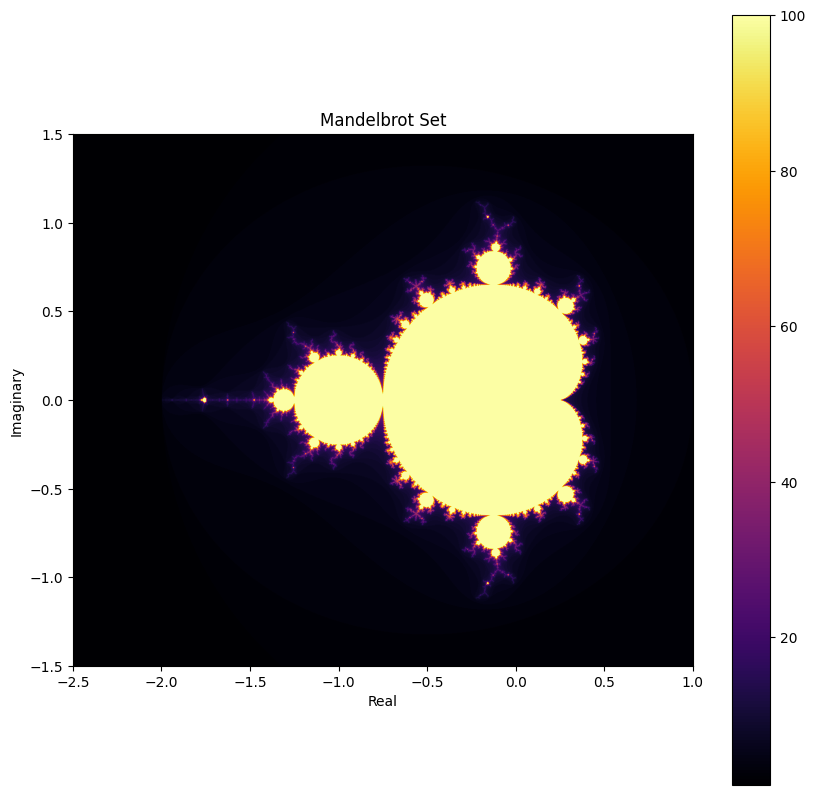

In [11]:
@njit   # Numba decorator for just-in-time compilation which speeds up the code
def mandelbrot(c):
    z = 0
    for n in range(1, 100):
        z = z**2 + c
        if abs(z) > 2:
            return n
    return 100

resolution = 4000



@njit  #using numba again to speed up the code even more
def mandel_img():
    x = np.linspace(-2.5, 1, resolution)
    y = np.linspace(-1.5, 1.5, resolution)
    y=np.flip(y)  #flipping the y axis to get the correct orientation of the image
    
    z=np.asarray([mandelbrot(m+1j*n) for n in y for m in x])
    
    return z

img = mandel_img().reshape(resolution, resolution)  #reshaping the array to get the image matrix

plt.figure(figsize=(10,10))
plt.imshow(img, cmap='inferno', extent=[-2.5, 1, -1.5, 1.5])
plt.title('Mandelbrot Set')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.colorbar()   
plt.show()


# Question b)

In [12]:
@njit
def f(z):    #directly return the next iterate for Newton Rapson method
             #original function is z^3+1
    z=np.complex64(z)
    return np.complex64(z-(z**3+1)/(3*z**2))
#roots of f(z) are 1, -1/2+sqrt(3)/2*i, -1/2-sqrt(3)/2*i
roots=np.asarray([-1,math.e**(math.pi*1j/3),math.e**(-math.pi*1j/3)]).astype(np.complex64)

In [13]:
tol=np.float32(10**(-6))  #tolerance for convergence criterion, in float32

@njit   #use Numba to speed up the code
def NRFrac(init):
    approx=np.complex64(init)

    conv_cri=np.asarray([100 for i in range(3)])  #initialise the distance between approx and roots as a large number
    


    approx=f(approx)
        
    conv_cri=np.asarray([abs(approx-root) for root in roots]).astype(np.float32)
    count=1
    while np.all(conv_cri>tol) and count<1000:   #break if count>1000 or all the distance between 
                                                 #approx and roots are smaller than tolerance
                                                 #np.all returns True if all the elements in the array are True
        approx=f(approx)
        
        conv_cri=np.abs(approx-roots).astype(np.float32)
        count+=1
        
    return np.argmin(conv_cri)  #return the index of the root which approx converges to
                                #argmin returns the index of the smallest element in the array


In [14]:

def resolution(pix:int):   #return a subset of the complex plane with resolution pix*pix
    return np.linspace(-2,2,pix), np.linspace(-2,2,pix)


In [15]:
res_constant=3000

plane=resolution(res_constant)

x=plane[0]
y=plane[1]

y=np.flip(y)  #flip the y axis so that the image is not upside down


@njit   # Numba decorator for just-in-time compilation which speeds up the code
def image_gen():
    image=np.asarray([NRFrac(m+1j*n) for n in y for m in x])  #generate the image
    return image


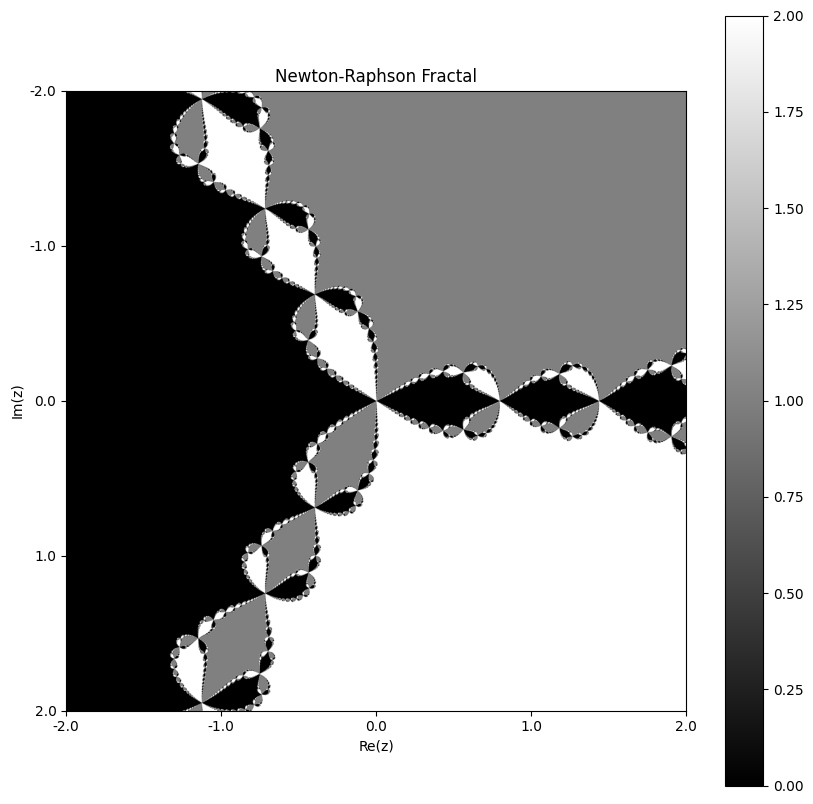

In [16]:
image=image_gen().reshape(res_constant,res_constant) #reshape the array into a matrix



#set figure size
plt.figure(figsize=(10,10))

plt.imshow(image,cmap="gray",extent=[0,res_constant,0,res_constant])
#axis as complex plane

plt.xlabel("Re(z)")
plt.ylabel("Im(z)")

plt.xticks(np.linspace(0,res_constant,5),np.linspace(-2,2,5))
plt.yticks(np.linspace(0,res_constant,5),np.linspace(2,-2,5))

plt.colorbar()

plt.title("Newton-Raphson Fractal")

plt.show()